In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

white = pd.read_csv('../winequality-white.csv', sep=';')
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
white['quality'].value_counts()


# An imbalanced dataset - with 75% of data points corresponding to only 2 classes

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

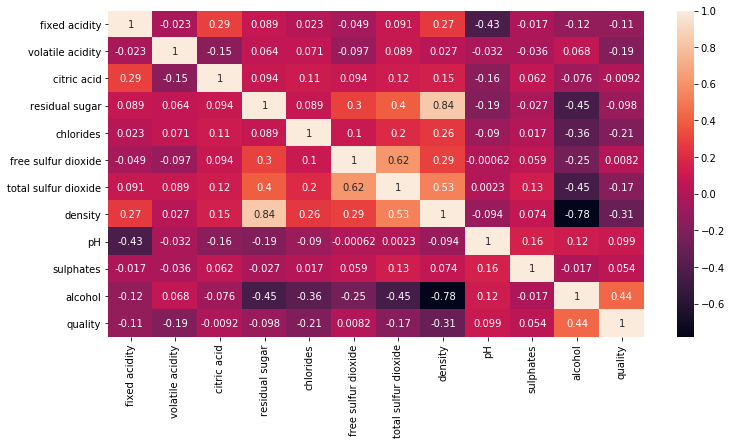

In [4]:
## Visualizing correlations

plt.figure(figsize=(12,6))
sns.heatmap(white.corr(),annot=True)

### Observations from Correlation map

1. Citric acid, free suphur dioxide and sulphates columns have very low correlations    with target variable (quality)
2. We can observe strong correlations among some predictor variables. So, a        linear model wont do the job. Its better to work with a non-linear model.

In [5]:
new_col = ['fixed acidity', 'volatile acidity','residual sugar','chlorides', 
           'total sulfur dioxide', 'density', 'pH', 'alcohol', 'quality']

# removing less correlated columns form dataset
white = white[[c for c in white.columns if c in new_col]]

white.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,9.9,6


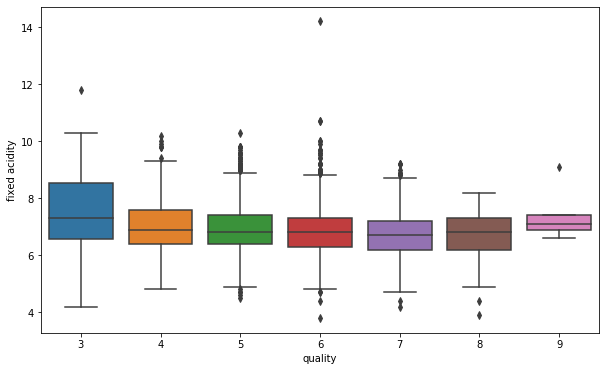

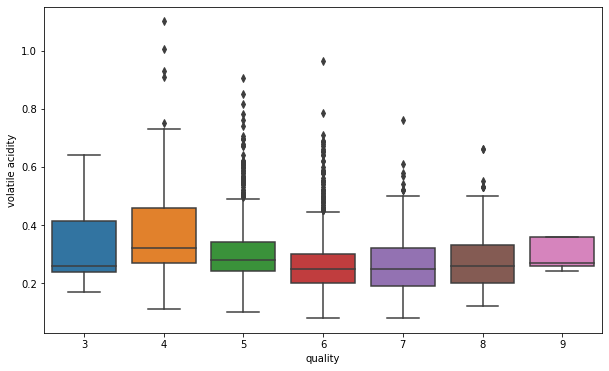

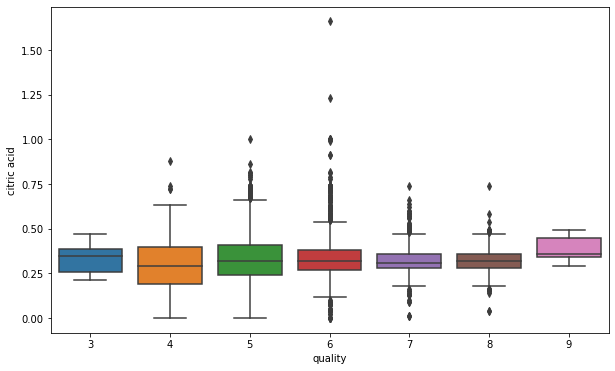

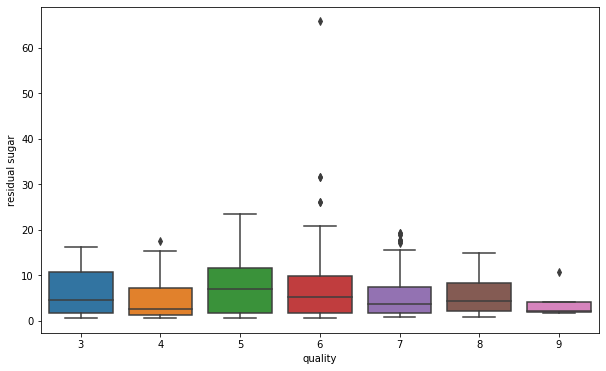

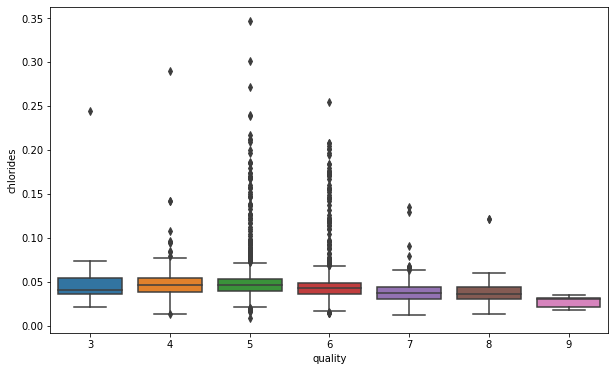

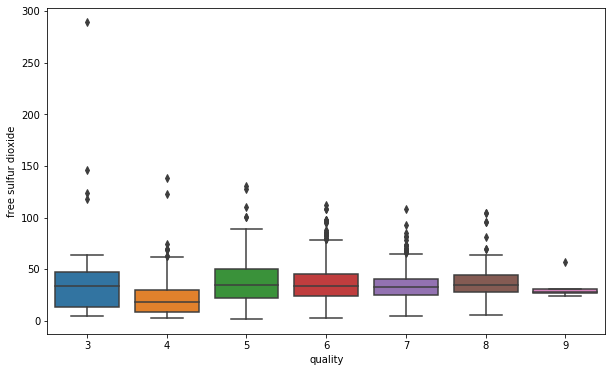

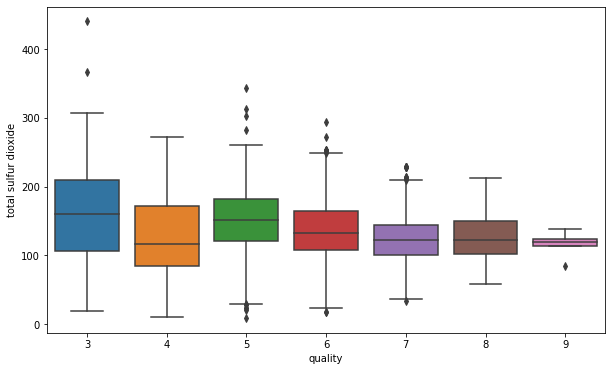

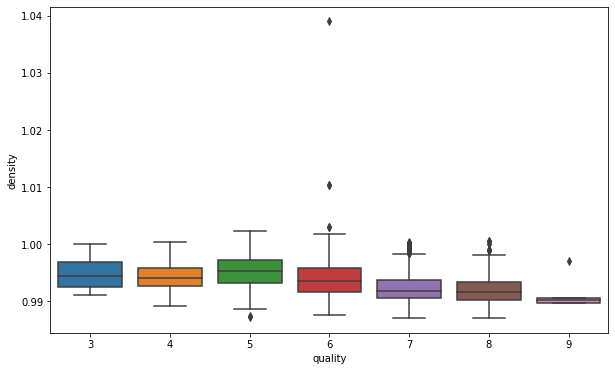

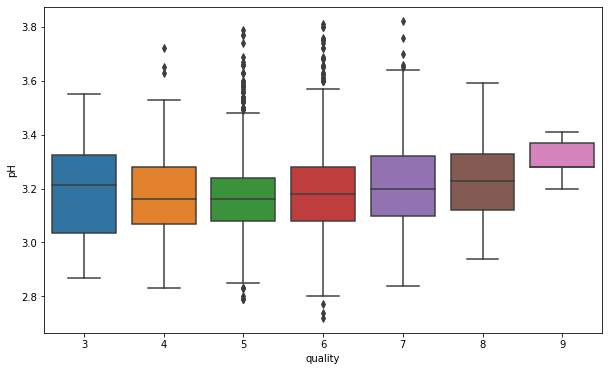

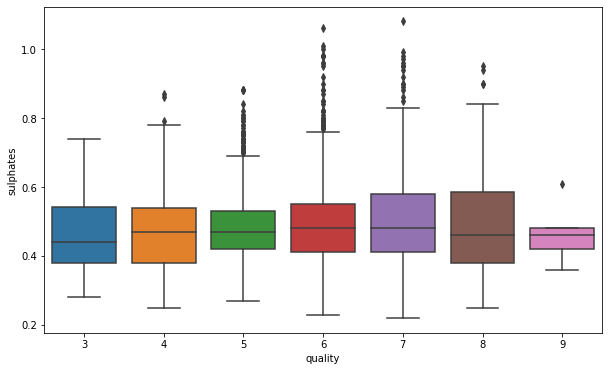

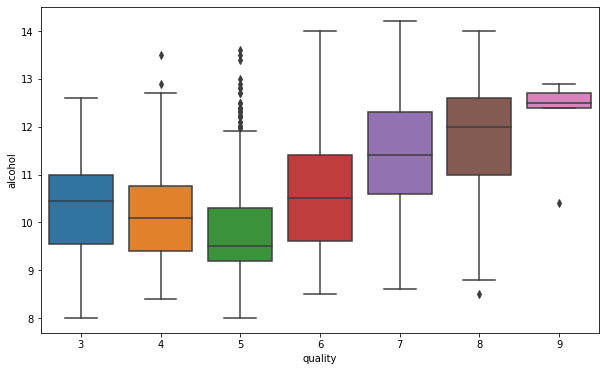

In [5]:
# Understanding data
# Plotting boxplot to understand distribution of predictor variables across target classes

for col in white.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.boxplot(x = 'quality', y = col, data = white)
    plt.show()

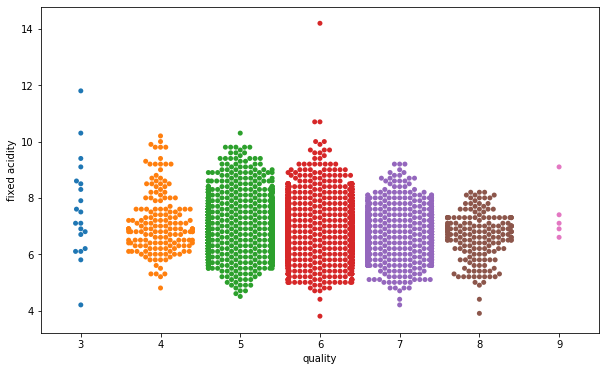

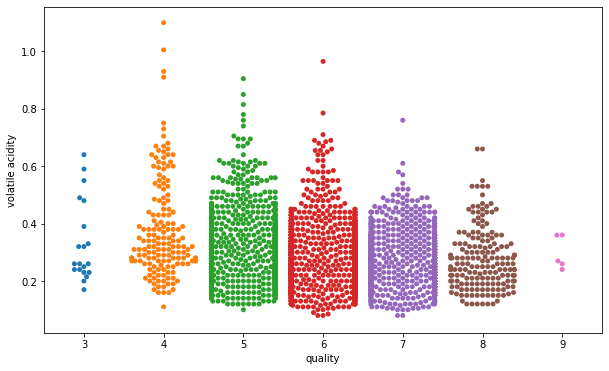

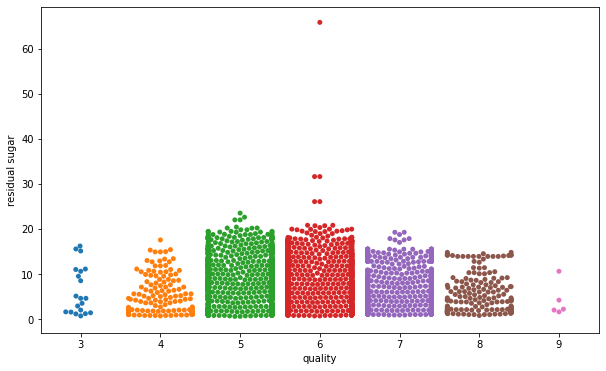

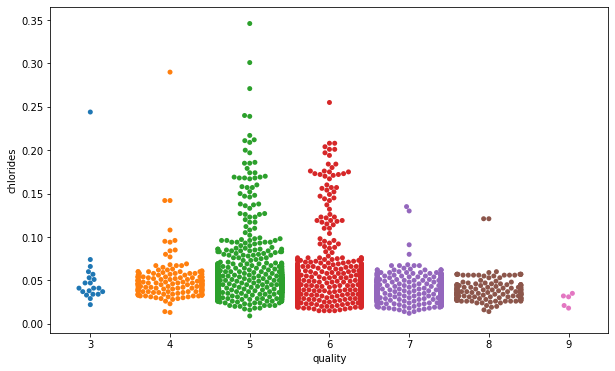

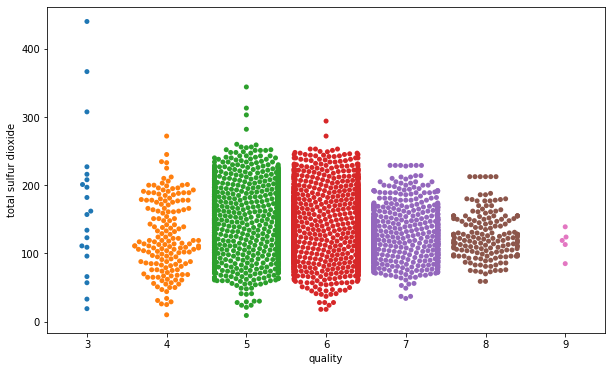

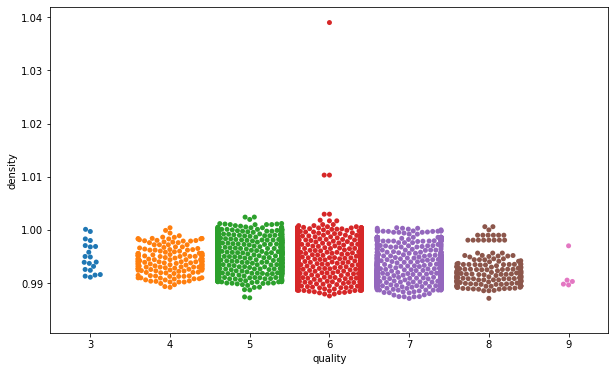

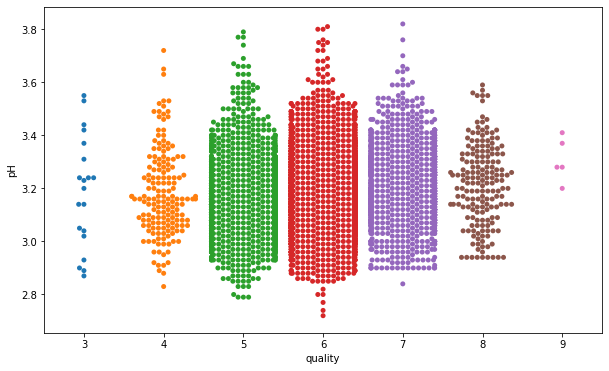

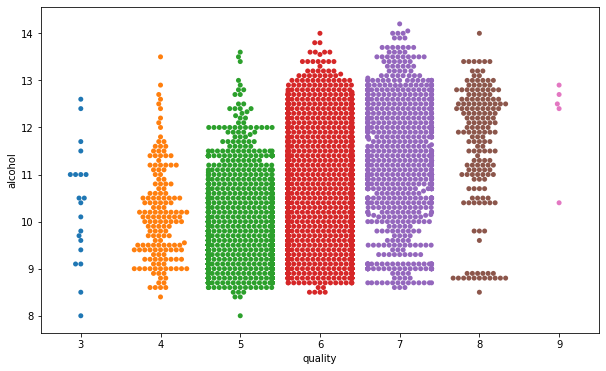

In [7]:
# Swarmplot on same data for better visualization

for col in white.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.swarmplot(x = 'quality', y = col, data = white)
    plt.show()

#### Observations

There are a lot of outliers across predictor variables.This definitely affects our mean and std during standardization.                                         
Observed that most predictor variable vales have a long tail going after 75%ile in boxplot. Since wine tasting and quality measurement is subjective to the taster, this point just validates it. There is no clear distribution.                     
We can remove these outliers or make our dataset more robust using some scaling techniques while keeping them in.                                                  
Trying out both now.

#### Choosing a scaler

Scikt Learn provides out of the box functionality for scaling datasets. Mainly 3 of them, StandardScaler, MinMaxScaler and RobustScaler.



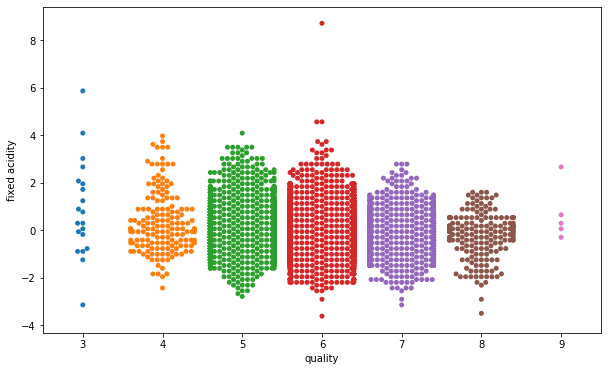

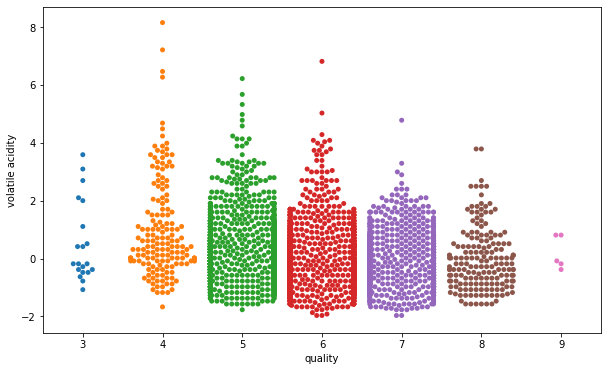

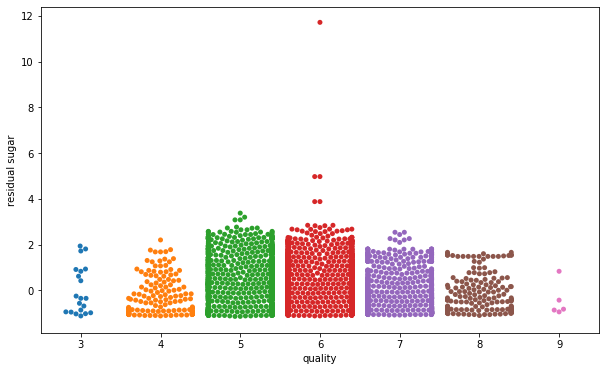

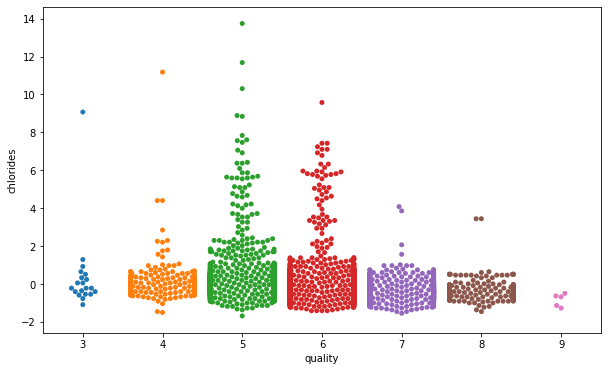

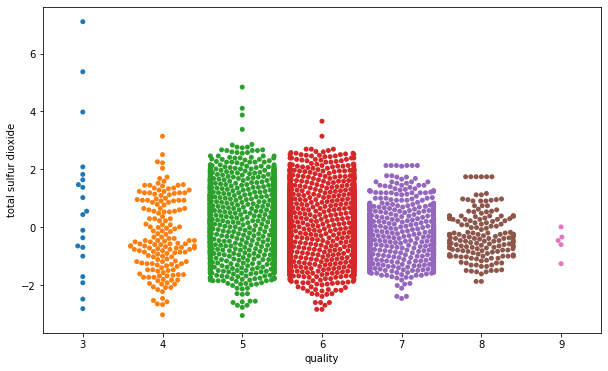

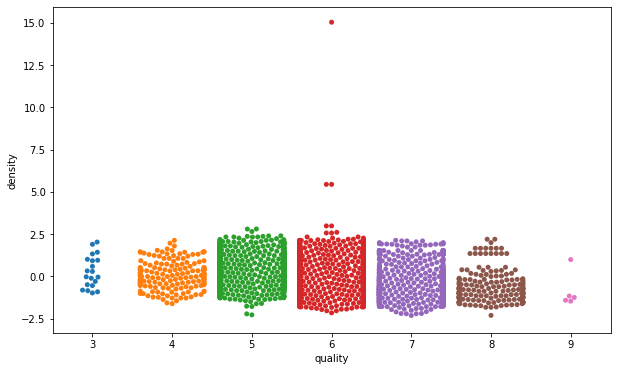

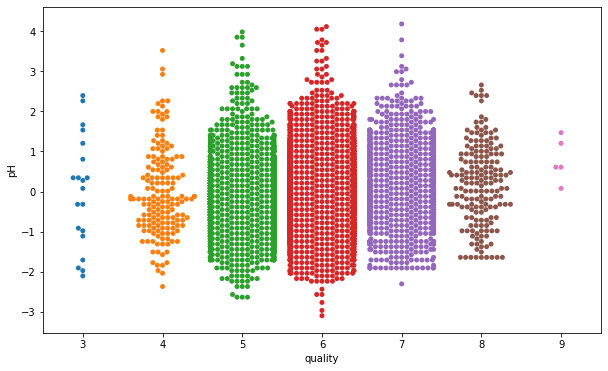

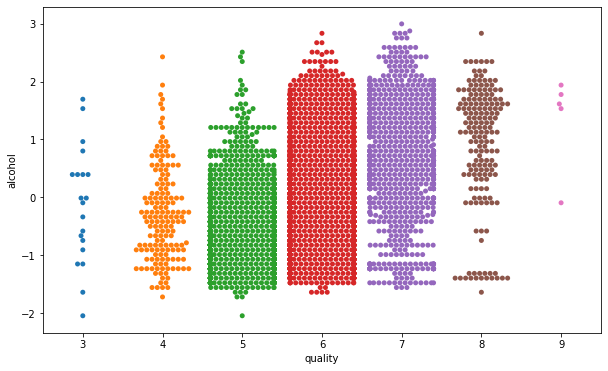

In [8]:
# performing above exercise on StandardScaler scaled X
from sklearn.preprocessing import StandardScaler
white_ssc = white.copy()
scaler = StandardScaler().fit(white_ssc[white_ssc.columns[:-1]])
white_ssc[white_ssc.columns[:-1]] = scaler.transform(white_ssc[white_ssc.columns[:-1]])

for col in white_ssc.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.swarmplot(x = 'quality', y = col, data = white_ssc)
    plt.show()

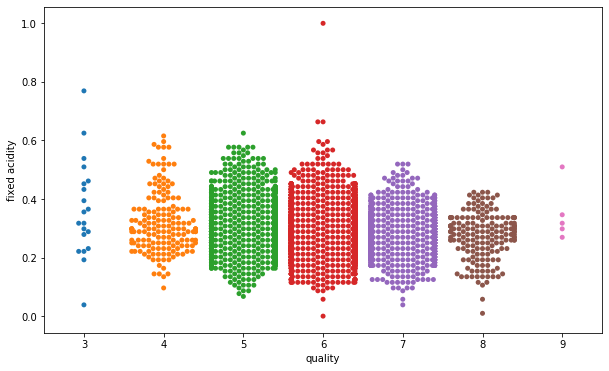

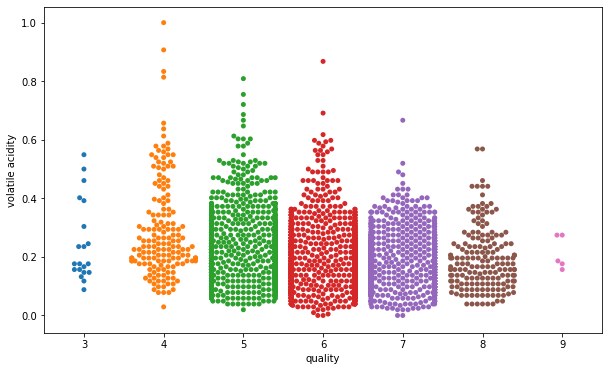

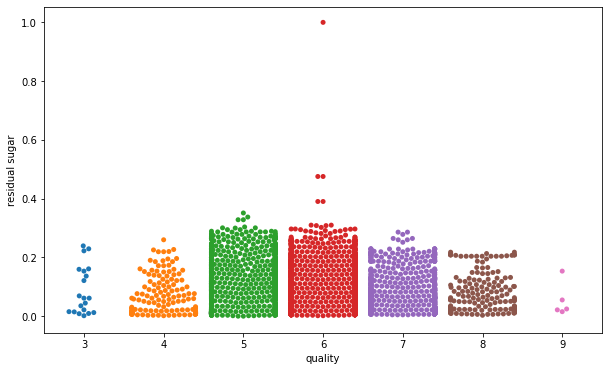

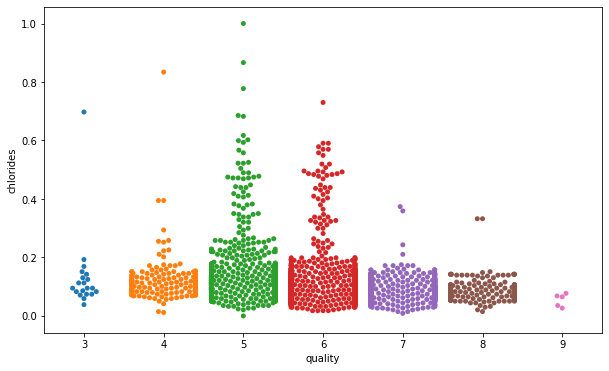

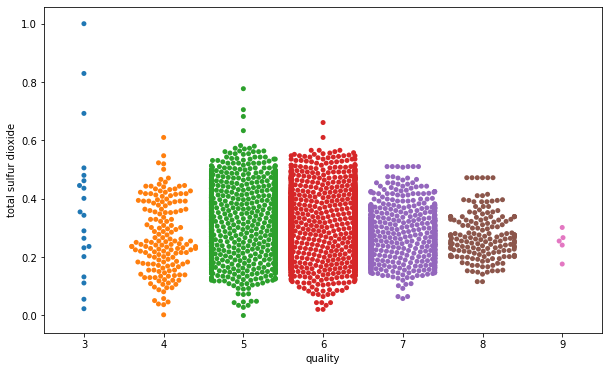

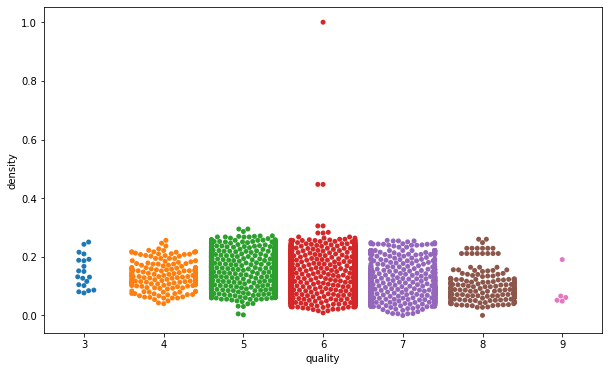

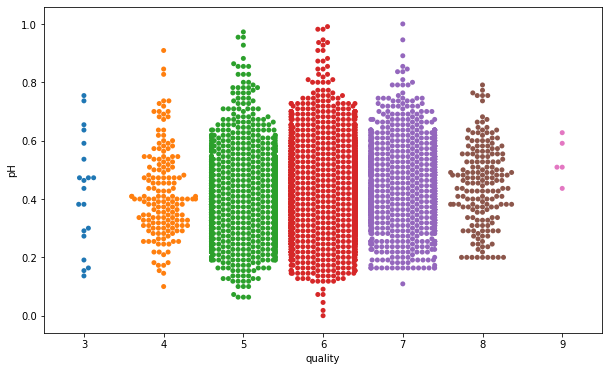

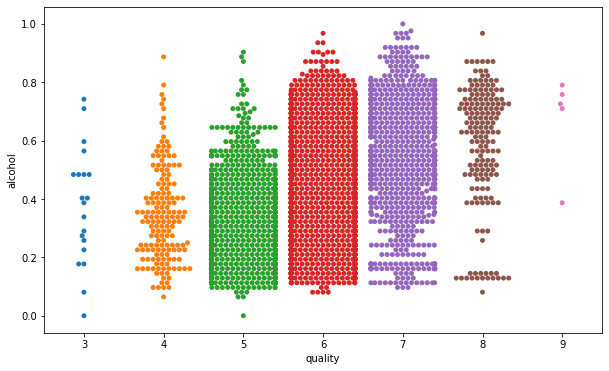

In [9]:
# performing above exercise on MinMax scaled X
from sklearn.preprocessing import MinMaxScaler
white_sc = white.copy()
scaler = MinMaxScaler().fit(white_sc[white_sc.columns[:-1]])
white_sc[white_sc.columns[:-1]] = scaler.transform(white_sc[white_sc.columns[:-1]])

for col in white_sc.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.swarmplot(x = 'quality', y = col, data = white_sc)
    plt.show()

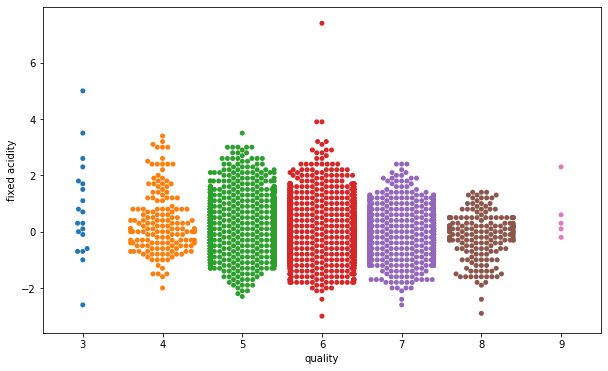

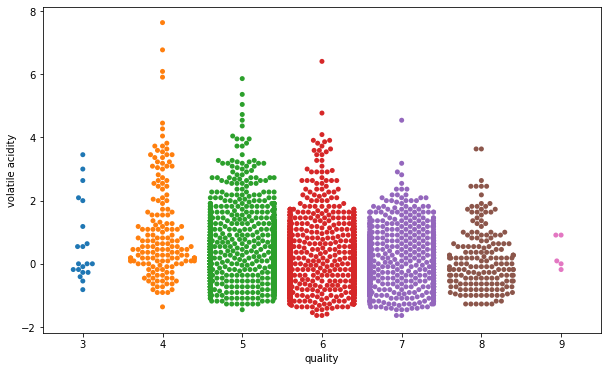

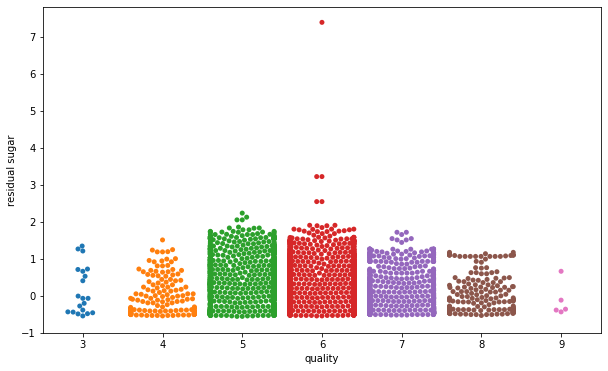

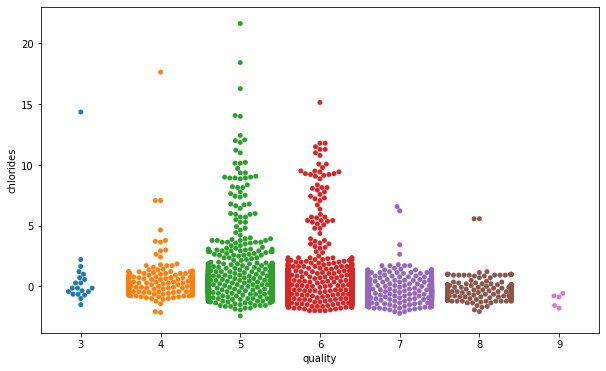

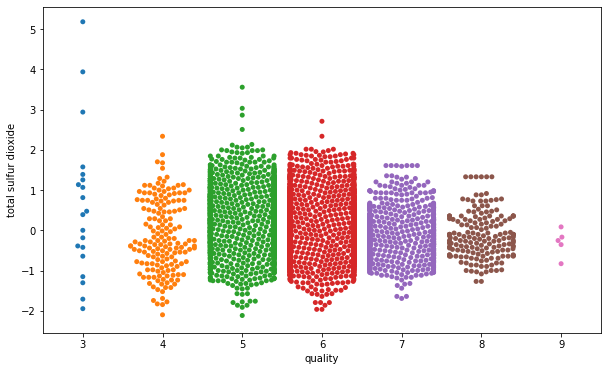

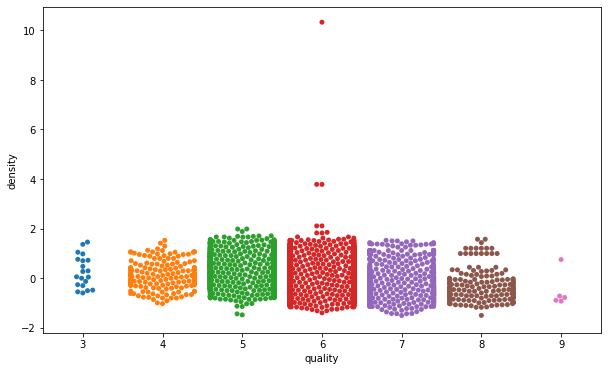

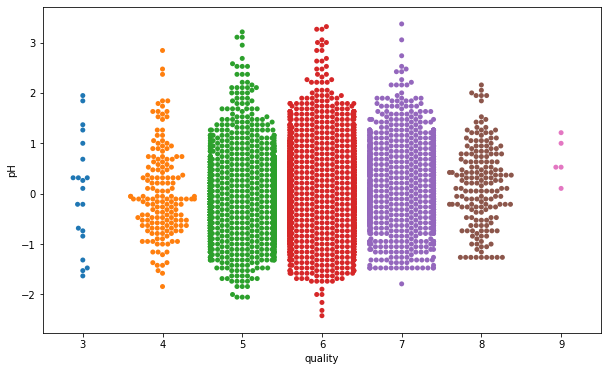

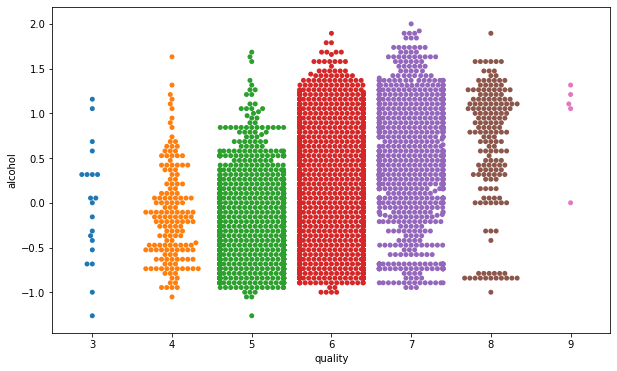

In [10]:
# performing above esercise using robust scaler X
from sklearn.preprocessing import RobustScaler
white_rsc = white.copy()
scaler = RobustScaler().fit(white_rsc[white_rsc.columns[:-1]])
white_rsc[white_rsc.columns[:-1]] = scaler.transform(white_rsc[white_rsc.columns[:-1]])

for col in white_rsc.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.swarmplot(x = 'quality', y = col, data = white_rsc)
    plt.show()

#### Observations

As you can see with each scaler, the range of data changes but the distribution remains the same.                                                               Going ahead with the data "white_ssc" scaled using StandardScaler and try to remove outliers from it.                                                        Defining outliers here as points with > 50 % jump from 95%ile to 99%ile in each column

In [7]:
from sklearn.preprocessing import StandardScaler
white_ssc = white.copy()
scaler = StandardScaler().fit(white_ssc[white_ssc.columns[:-1]])
white_ssc[white_ssc.columns[:-1]] = scaler.transform(white_ssc[white_ssc.columns[:-1]])


In [9]:
white_ssc.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol,quality
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4898.000000
mean,7.584333e-17,5.196832e-16,-1.024542e-16,6.482723e-17,1.057636e-16,3.212112e-14,-1.203860e-15,-2.178784e-15,5.877909
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,0.885639
min,-3.620351e+00,-1.966985e+00,-1.141944e+00,-1.683274e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.043297e+00,3.000000
25%,-6.575011e-01,-6.771010e-01,-9.250474e-01,-4.473347e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-8.242757e-01,5.000000
50%,-6.493106e-02,-1.809917e-01,-2.349217e-01,-1.269060e-01,-1.026189e-01,-9.609320e-02,-5.475133e-02,-9.286267e-02,6.000000
75%,5.276390e-01,4.143393e-01,6.918185e-01,1.935226e-01,6.739664e-01,6.930457e-01,6.075653e-01,7.198184e-01,6.000000
max,8.705106e+00,8.153643e+00,1.171411e+01,1.374308e+01,7.098444e+00,1.503130e+01,4.184075e+00,2.995326e+00,9.000000


In [15]:
# clipping top 5 %ile outliers

# selecting only the columns that have > 50% or more deviation from 95%ile to 99%ile
for col in white_ssc.columns[:-1]:
    print(col)
    print('Pre clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('% increase btw 95%ile and 99%ile = ', ((white_ssc[col].quantile(.99) -white_ssc[col].quantile(.95) )/white_ssc[col].quantile(.99))*100)
    print('removing points above 95th percentile')
    white_ssc[white_ssc[col]< white_ssc[col].quantile(.95)]
    print('Post clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('------')

fixed acidity
Pre clipping  1.7127791254586744 2.779405239314694
% increase btw 95%ile and 99%ile =  38.37605609893047
removing points above 95th percentile
Post clipping  1.7127791254586744 2.779405239314694
------
volatile acidity
Pre clipping  1.7042232949960214 3.3701580593046163
% increase btw 95%ile and 99%ile =  49.43194755240461
removing points above 95th percentile
Post clipping  1.7042232949960214 3.3701580593046163
------
residual sugar
Pre clipping  1.8354553363214363 2.3792743746806733
% increase btw 95%ile and 99%ile =  22.856508023889592
removing points above 95th percentile
Post clipping  1.8354553363214363 2.3792743746806733
------
chlorides
Pre clipping  0.5597267582620875 0.7886043577317664
% increase btw 95%ile and 99%ile =  29.023121318780316
removing points above 95th percentile
Post clipping  0.5597267582620875 0.7886043577317664
------
total sulfur dioxide
Pre clipping  1.7329462364849049 2.4389328092445304
% increase btw 95%ile and 99%ile =  28.946536373763728


In [11]:
# clipping top 5 %ile outliers

# selecting only the columns that have > 50% or more deviation from 95%ile to 99%ile
for col in ['chlorides' ]:    
    print(col)
    print('Pre clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('% increase btw 95%ile and 99%ile = ', ((white_ssc[col].quantile(.99) -white_ssc[col].quantile(.95) )/white_ssc[col].quantile(.99))*100)
    print('removing points above 95th percentile')
    white_ssc = white_ssc[white_ssc[col]< white_ssc[col].quantile(.95)]
    print('Post clipping ',white_ssc[col].quantile(.95) , white_ssc[col].quantile(.99))
    print('------')

chlorides
Pre clipping  0.9717064373075095 5.228829787443533
% increase btw 95%ile and 99%ile =  81.41636892367472
removing points above 95th percentile
Post clipping  0.5597267582620875 0.7886043577317664
------


In [33]:
import numpy as np
print(np.percentile(white_ssc['fixed acidity'], 97), 
      np.percentile(white_ssc['fixed acidity'], 99),
      np.percentile(white_ssc['fixed acidity'], 100))
print('\n')
print(np.percentile(white_ssc['volatile acidity'], 97),
      np.percentile(white_ssc['volatile acidity'], 99),
      np.percentile(white_ssc['volatile acidity'], 100))
print('\n')
print(np.percentile(white_ssc['density'], 97),
      np.percentile(white_ssc['density'], 99),
      np.percentile(white_ssc['density'], 100))
      

2.06832116341068 2.779405239314694 8.705105871848145


2.200332516052781 3.3701580593046163 8.153643168733899


1.8633787773901827 2.0678861258952015 5.441254233576675


### A purely random classifier - just as a reference


In [4]:
# just a baseline purely random classifier
# for a balanced binary classification problem the below accuracy would be 50%
# assumption - purely balanced between all classes (not in our case)
from sklearn.model_selection import train_test_split

import numpy as np
import random

X = white[white.columns[:-1]]
Y = white[white.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

random.seed(5)
test_labels_copy = random.sample(list(y_test), len(y_test), )
hits_array = np.array(y_test) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(y_test)

# our baseline random classifier performs ~31% on the test set

0.3142857142857143

#### Conclusion

Doing the outlier removal, cost us a loss of about 5 % of our data points. Which is acceptable.                                                           

Although, from close analysis I realised most columns have very high max values as compared to 95% or even 97%ile. Which makes outlier removal difficult as removing them would mean losing a lot of valuable data.

Going ahead with the 5% outlier removal. So far we have scaled our data and performed outlier removal

#### Also

RobustScaler and MinMaxScaler didn't do a great job when the scaled values were used on KNN or Neural Net. So I chose the StandardScaler to do the job.